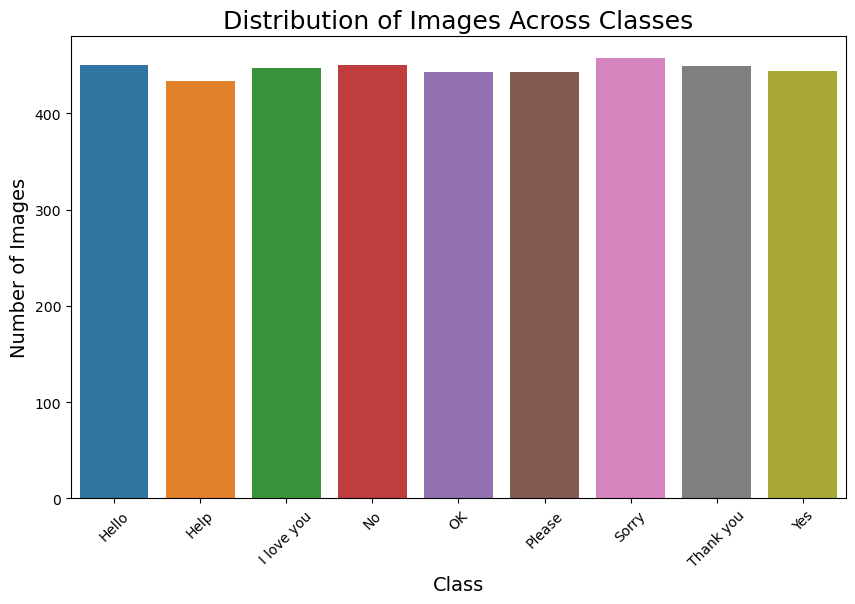

In [44]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random

# Set the data directory
data_dir = "C:/Users/Semi/Desktop/projects done/Sign language detection/data/"

# Function to load and analyze image data
def explore_data(data_dir):
    class_folders = os.listdir(data_dir)
    class_counts = []
    
    # Loop through each class folder and count the images
    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        if os.path.isdir(class_path):
            class_counts.append(len(os.listdir(class_path)))
    
    # Visualize the distribution of images across different classes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_folders, y=class_counts)
    plt.title('Distribution of Images Across Classes', fontsize=18)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

# Call the function to explore the data
explore_data(data_dir)


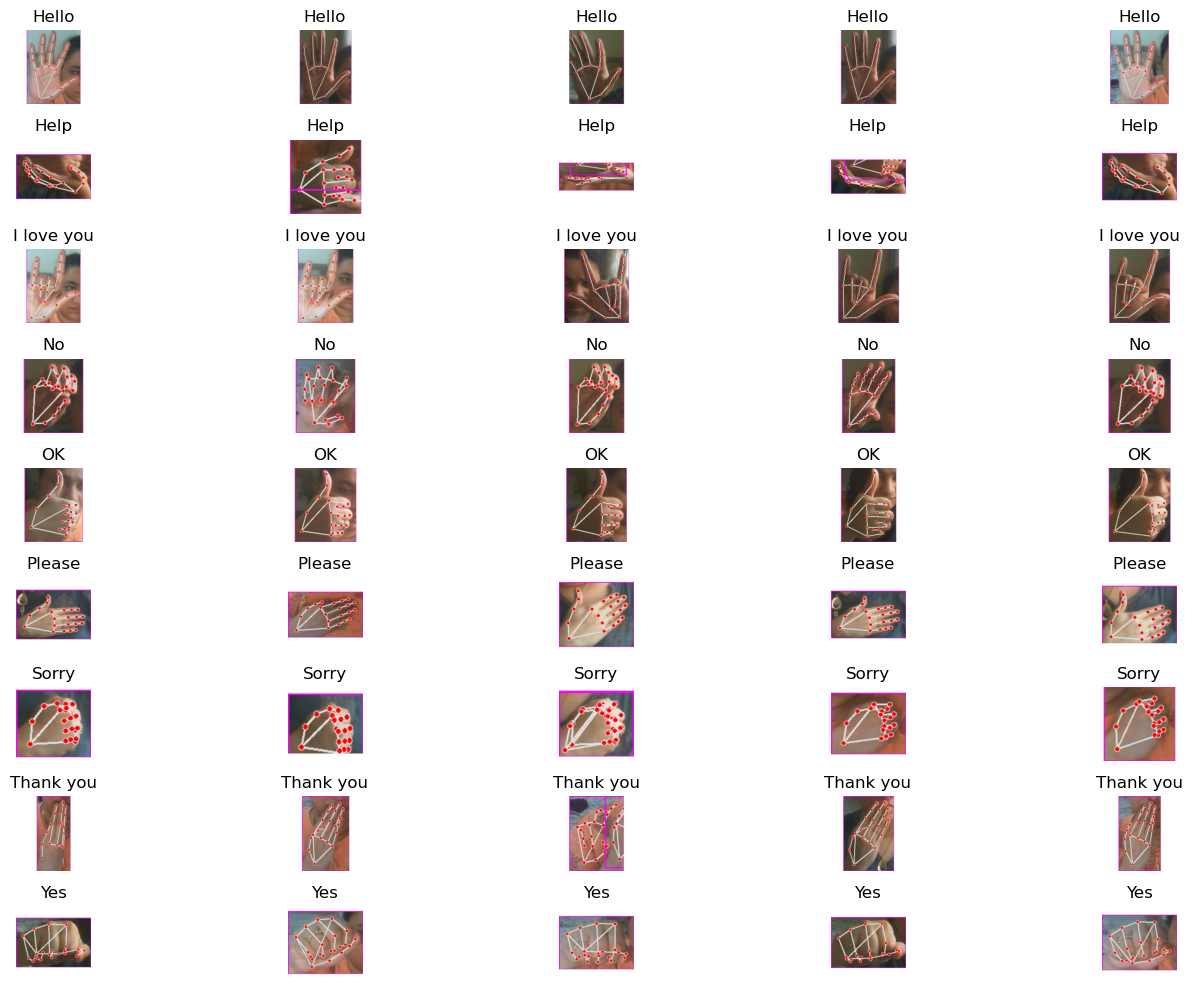

In [33]:
def visualize_random_samples(data_dir, num_samples=3):
    class_folders = os.listdir(data_dir)
    plt.figure(figsize=(15, 10))
    
    for class_index, class_folder in enumerate(class_folders):
        class_path = os.path.join(data_dir, class_folder)
        images = os.listdir(class_path)
        
        # Randomly select images from each class
        random_images = random.sample(images, min(num_samples, len(images)))
        
        for i, image_name in enumerate(random_images):
            image_path = os.path.join(class_path, image_name)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Plot the image
            plt.subplot(len(class_folders), num_samples, class_index * num_samples + i + 1)
            plt.imshow(img)
            plt.title(class_folder)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize random samples from each class
visualize_random_samples(data_dir, num_samples=5)


In [3]:
def check_image_shapes(data_dir):
    class_folders = os.listdir(data_dir)
    img_shapes = []
    
    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img_shapes.append(img.shape)
    
    # Print unique image shapes
    unique_shapes = set(img_shapes)
    print(f"Unique image shapes in dataset: {unique_shapes}")

# Call the function to check image shapes
check_image_shapes(data_dir)


Unique image shapes in dataset: {(300, 300, 3)}


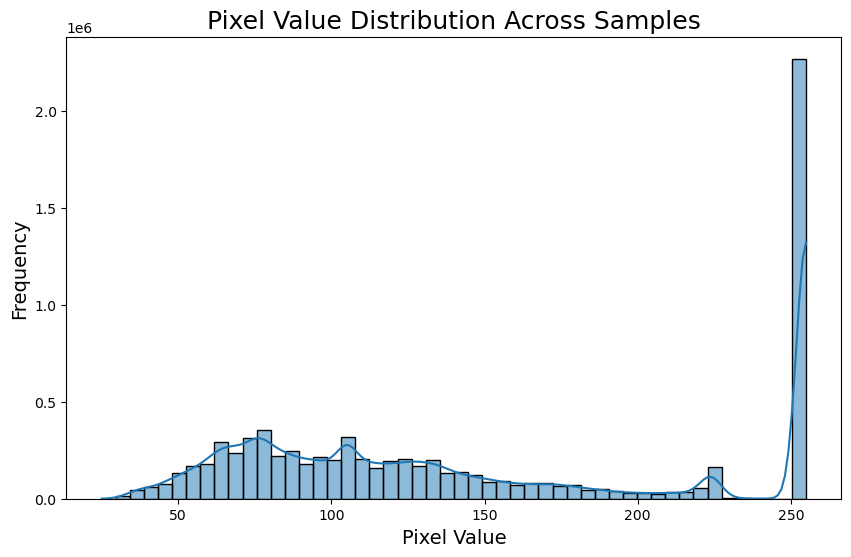

In [4]:
def plot_pixel_value_distribution(data_dir, num_samples=100):
    class_folders = os.listdir(data_dir)
    pixel_values = []
    
    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        image_files = os.listdir(class_path)
        
        # Limit the number of images to analyze
        selected_images = random.sample(image_files, min(num_samples, len(image_files)))
        
        for img_name in selected_images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale for simplicity
            pixel_values.extend(img.flatten())
    
    # Plot pixel value distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(pixel_values, bins=50, kde=True)
    plt.title('Pixel Value Distribution Across Samples', fontsize=18)
    plt.xlabel('Pixel Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

# Call the function to plot pixel value distribution
plot_pixel_value_distribution(data_dir, num_samples=10)


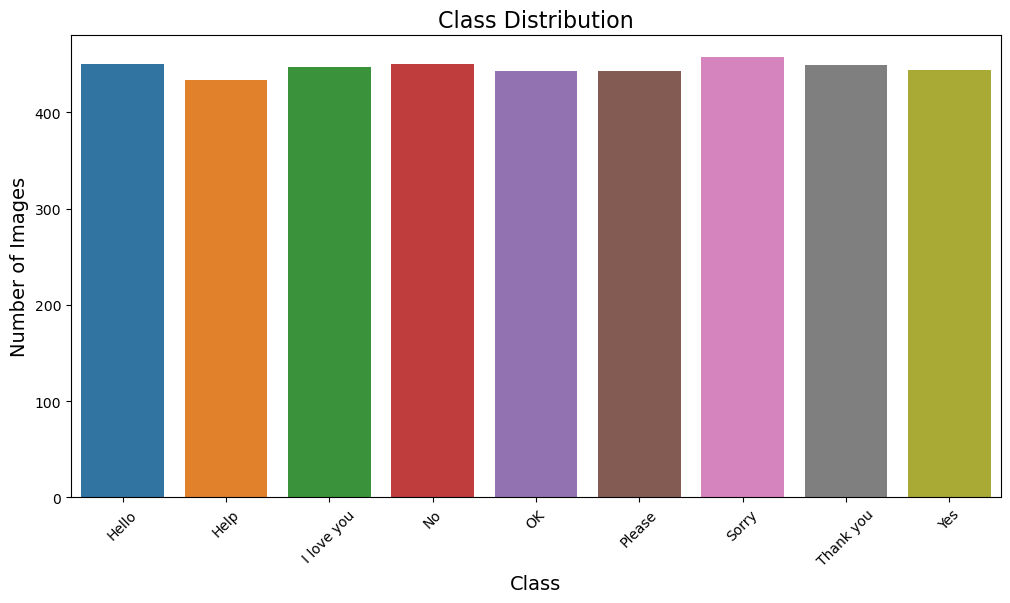

In [5]:
def plot_class_distribution(data_dir):
    class_folders = os.listdir(data_dir)
    class_counts = {}
    
    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        class_counts[class_folder] = len(os.listdir(class_path))
    
    # Plot class distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title('Class Distribution', fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

# Call the function to check for class imbalance
plot_class_distribution(data_dir)


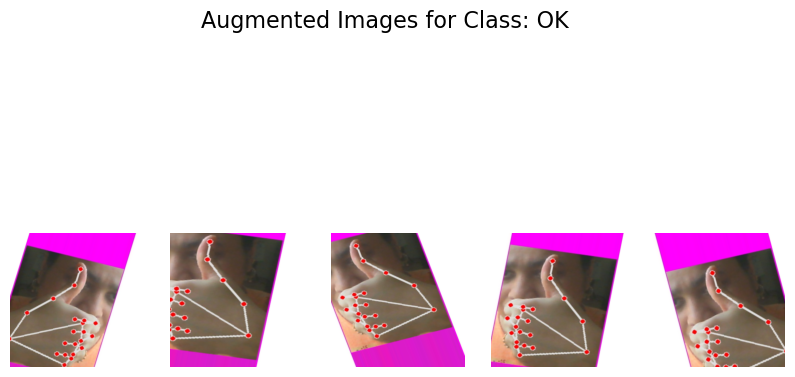

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example: Applying augmentation to visualize the effects
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_and_visualize(data_dir, class_name, num_samples=5):
    class_path = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_path)
    
    # Select a random image to apply augmentations
    img_path = os.path.join(class_path, random.choice(image_files))
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape((1,) + img.shape)
    
    # Generate augmented images
    plt.figure(figsize=(10, 6))
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(batch[0].astype('uint8'))
        plt.axis('off')
        i += 1
        if i == num_samples:
            break
    
    plt.suptitle(f"Augmented Images for Class: {class_name}", fontsize=16)
    plt.show()

# Visualize augmentations for a class
augment_and_visualize(data_dir, 'OK', num_samples=5)


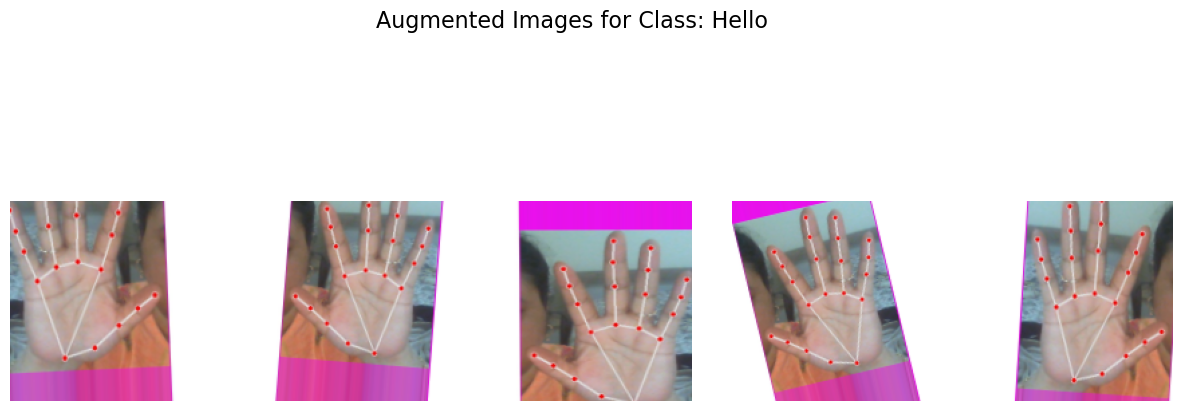

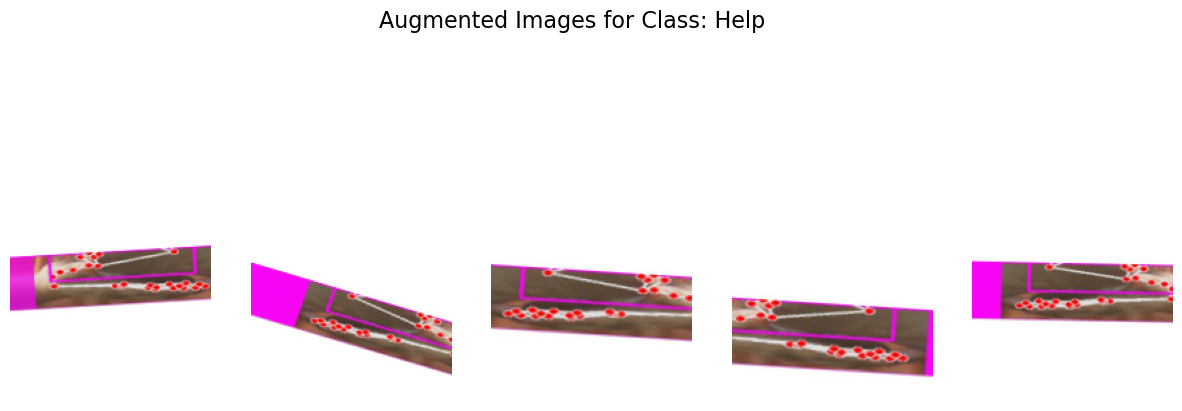

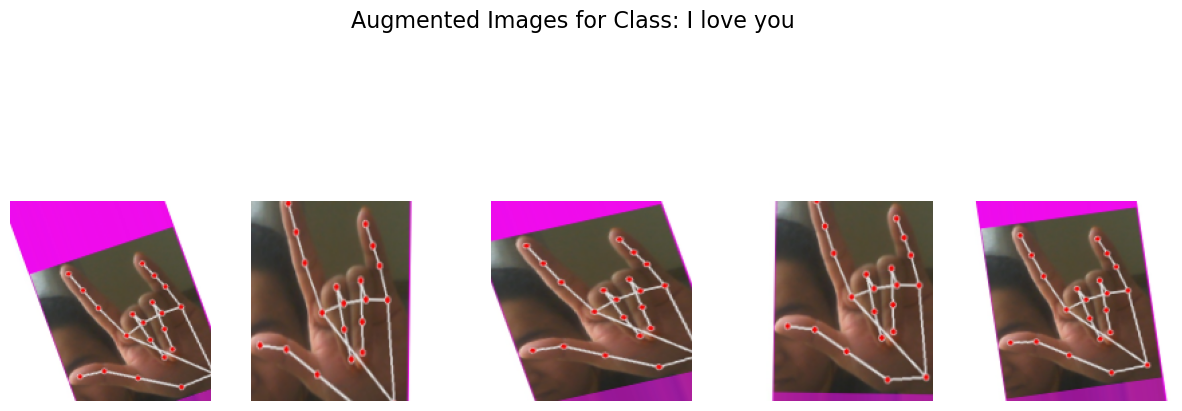

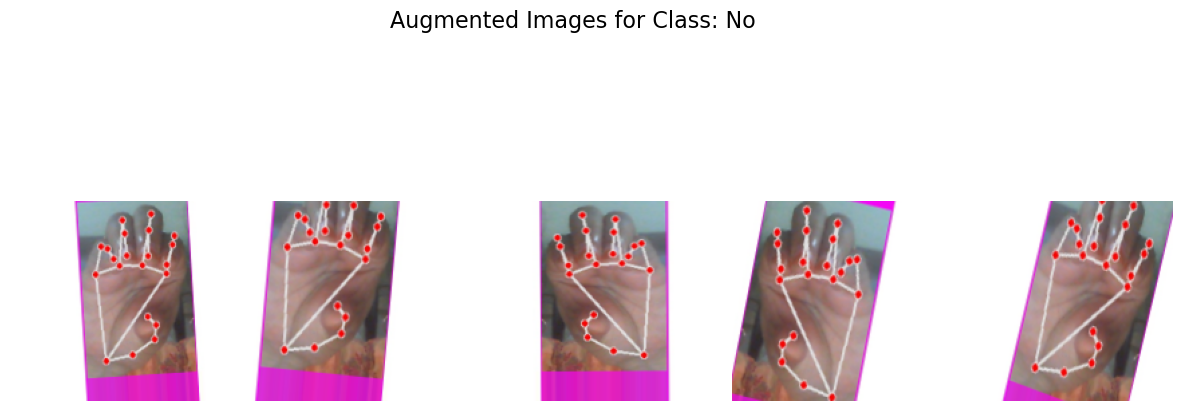

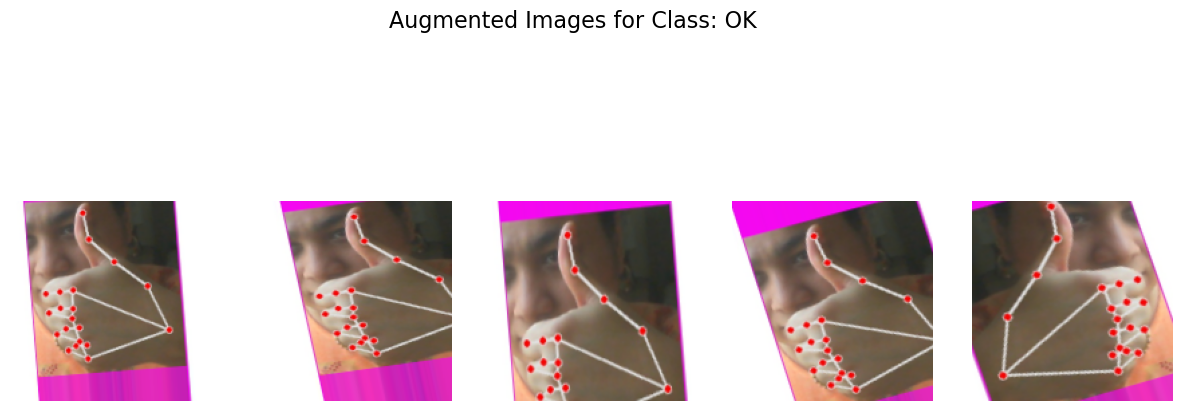

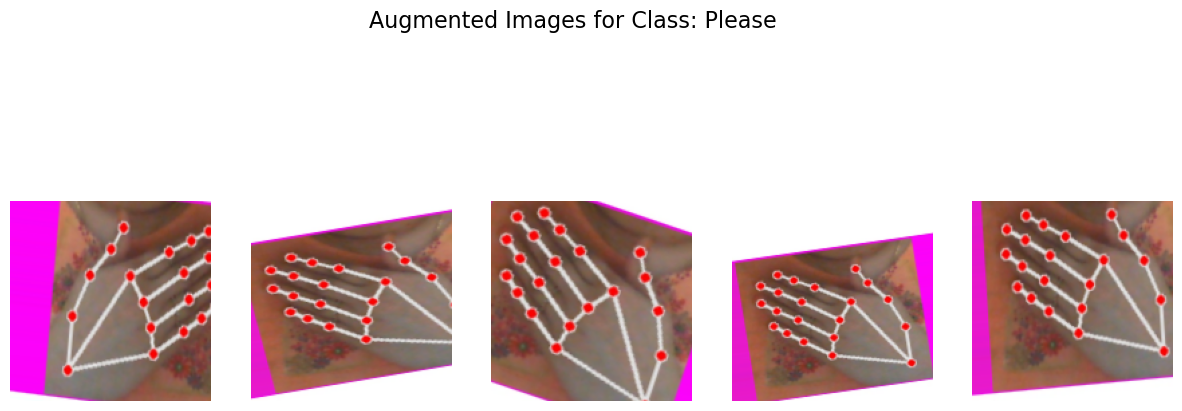

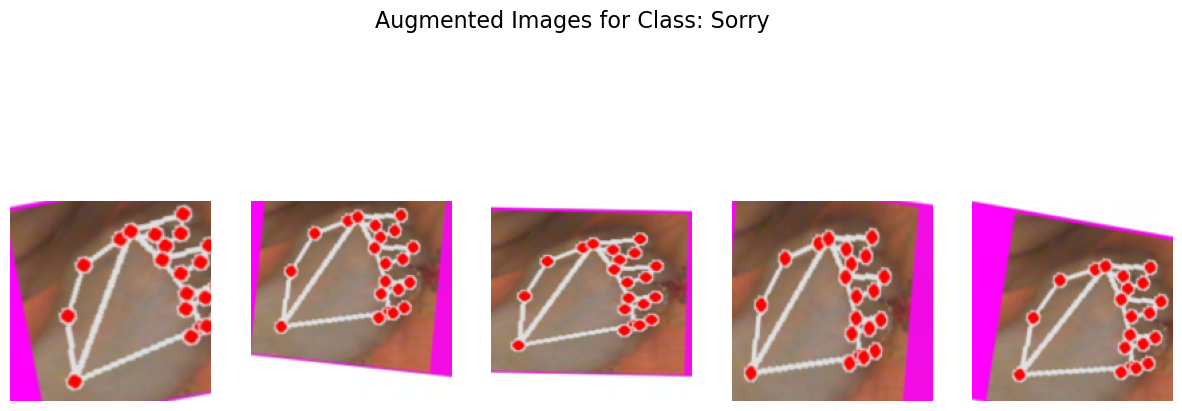

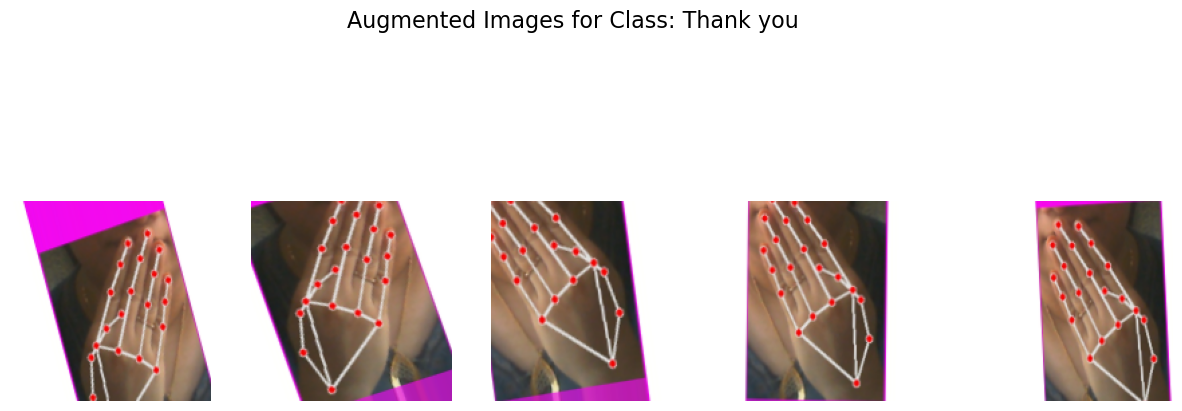

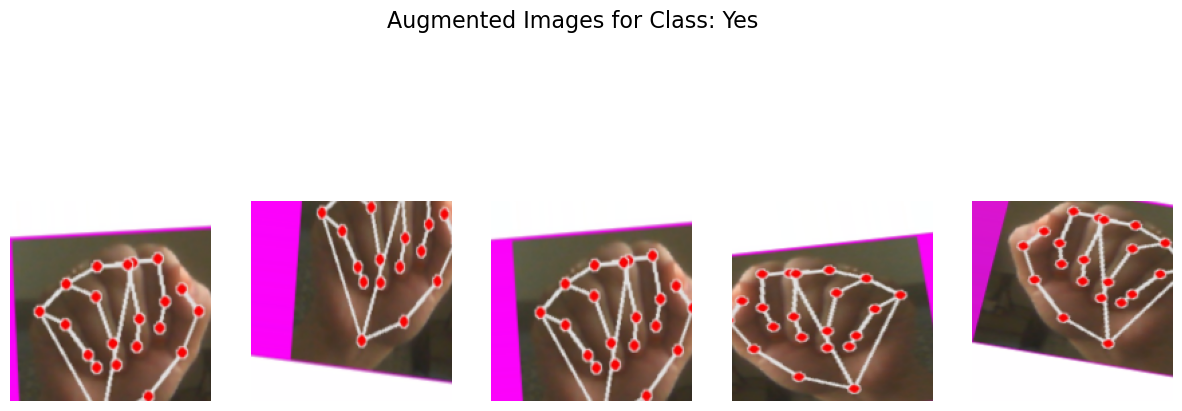

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_and_visualize_all_classes(data_dir, num_samples=5):
    # List all class folders in the directory
    class_folders = os.listdir(data_dir)

    for class_name in class_folders:
        class_path = os.path.join(data_dir, class_name)
        image_files = os.listdir(class_path)
        
        # Select a random image from the class
        img_path = os.path.join(class_path, random.choice(image_files))
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
        img = cv2.resize(img, (150, 150))  # Resize to have consistent image size
        img = img.reshape((1,) + img.shape)  # Reshape to be compatible with datagen flow
        
        # Set up the plot for visualization
        plt.figure(figsize=(15, 6))
        plt.suptitle(f"Augmented Images for Class: {class_name}", fontsize=16)
        
        # Generate and visualize augmented images
        i = 0
        for batch in datagen.flow(img, batch_size=1):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(batch[0].astype('uint8'))
            plt.axis('off')
            i += 1
            if i == num_samples:
                break
        
        # Show the augmentations for the current class
        plt.show()

# Visualize augmentations for all classes

augment_and_visualize_all_classes(data_dir, num_samples=5)

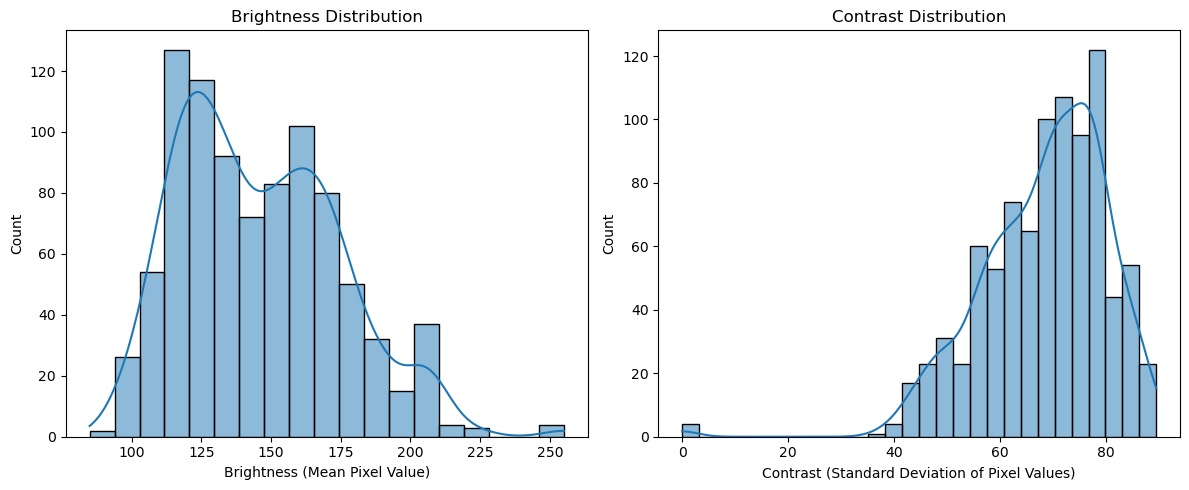

In [7]:
def analyze_brightness_contrast(data_dir, num_samples=100):
    class_folders = os.listdir(data_dir)
    brightness_values = []
    contrast_values = []
    
    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        image_files = os.listdir(class_path)
        
        selected_images = random.sample(image_files, min(num_samples, len(image_files)))
        
        for img_name in selected_images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            brightness = img.mean()
            contrast = img.std()
            
            brightness_values.append(brightness)
            contrast_values.append(contrast)
    
    # Plot brightness and contrast distributions
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(brightness_values, kde=True)
    plt.title("Brightness Distribution")
    plt.xlabel("Brightness (Mean Pixel Value)")
    
    plt.subplot(1, 2, 2)
    sns.histplot(contrast_values, kde=True)
    plt.title("Contrast Distribution")
    plt.xlabel("Contrast (Standard Deviation of Pixel Values)")
    
    plt.tight_layout()
    plt.show()

# Analyze brightness and contrast
analyze_brightness_contrast(data_dir)


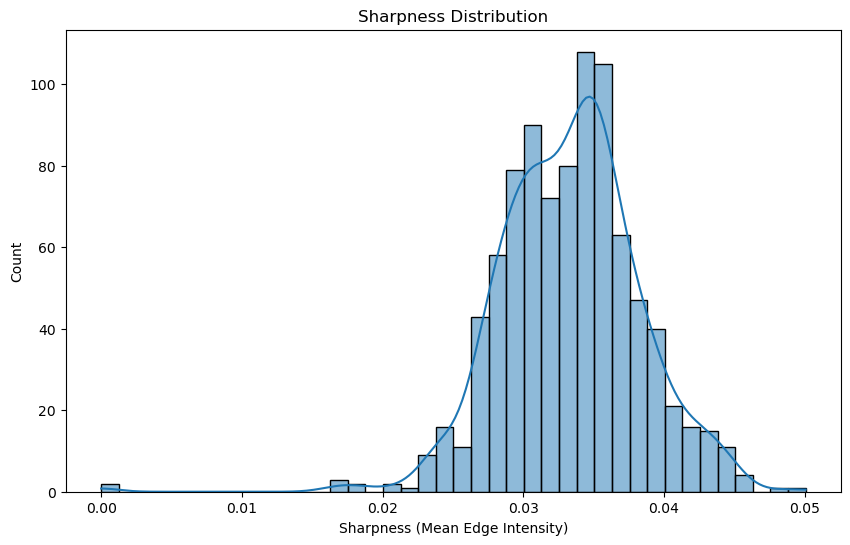

In [8]:
from skimage import filters

def analyze_image_sharpness(data_dir, num_samples=100):
    class_folders = os.listdir(data_dir)
    sharpness_values = []

    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        image_files = os.listdir(class_path)

        selected_images = random.sample(image_files, min(num_samples, len(image_files)))

        for img_name in selected_images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # Apply Sobel filter to detect edges
            edges = filters.sobel(img)
            sharpness = edges.mean()
            
            sharpness_values.append(sharpness)
    
    # Plot sharpness distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(sharpness_values, kde=True)
    plt.title("Sharpness Distribution")
    plt.xlabel("Sharpness (Mean Edge Intensity)")
    plt.show()

# Analyze image sharpness
analyze_image_sharpness(data_dir)


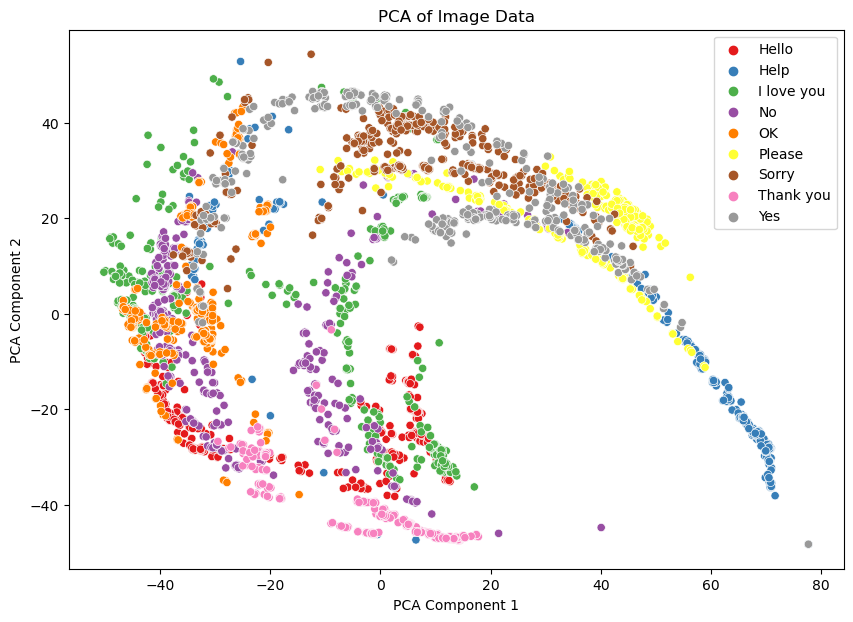

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def visualize_image_correlations(data_dir, num_samples=400):
    class_folders = os.listdir(data_dir)
    all_images = []
    labels = []

    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        image_files = os.listdir(class_path)

        selected_images = random.sample(image_files, min(num_samples, len(image_files)))

        for img_name in selected_images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64)).flatten()  # Resize and flatten
            
            all_images.append(img)
            labels.append(class_folder)
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_images = scaler.fit_transform(all_images)
    
    # PCA for dimensionality reduction
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_images)
    
    # Plot PCA result
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette='Set1')
    plt.title("PCA of Image Data")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Visualize image correlations using PCA
visualize_image_correlations(data_dir)


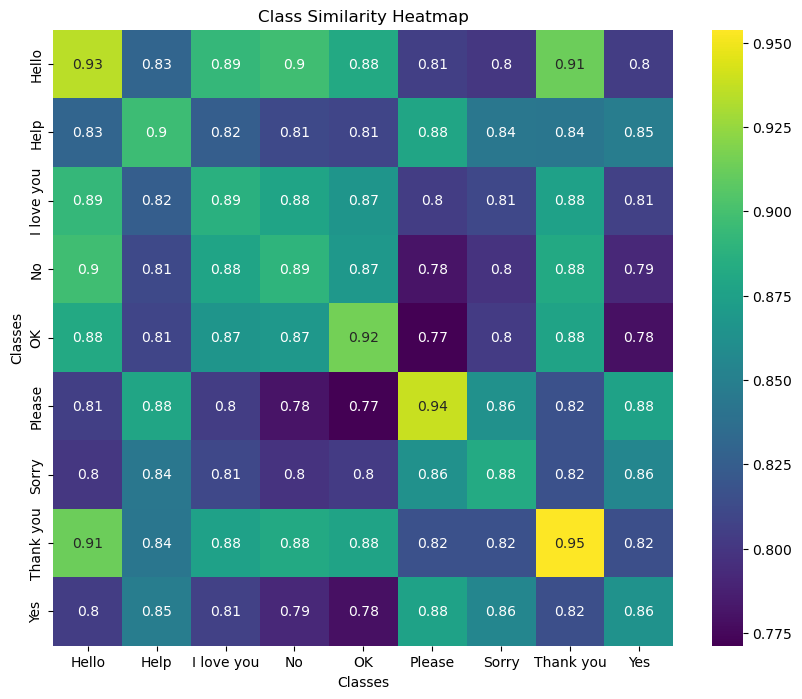

In [21]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

def plot_class_similarity_heatmap(data_dir, num_samples=50):
    class_folders = os.listdir(data_dir)
    feature_vectors = []
    class_names = []

    # Loop through each class folder and process images
    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        image_files = os.listdir(class_path)

        # Randomly select images for each class
        selected_images = random.sample(image_files, min(num_samples, len(image_files)))

        # Loop through selected images
        for img_name in selected_images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64)).flatten()  # Resize and flatten the image
            
            feature_vectors.append(img)
        class_names.append(class_folder)

    # Convert feature_vectors to numpy array for further processing
    feature_vectors = np.array(feature_vectors)

    # Compute the cosine similarity matrix for all feature vectors
    similarity_matrix = cosine_similarity(feature_vectors)

    # Reshape the similarity matrix to compute mean similarity per class
    num_classes = len(class_names)
    mean_similarity_matrix = np.mean(
        similarity_matrix.reshape(num_classes, num_samples, num_classes, num_samples),
        axis=(1, 3)
    )

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(mean_similarity_matrix, xticklabels=class_names, yticklabels=class_names, cmap="viridis", annot=True)
    plt.title('Class Similarity Heatmap')
    plt.xlabel('Classes')
    plt.ylabel('Classes')
    plt.show()
plot_class_similarity_heatmap(data_dir, num_samples=400)

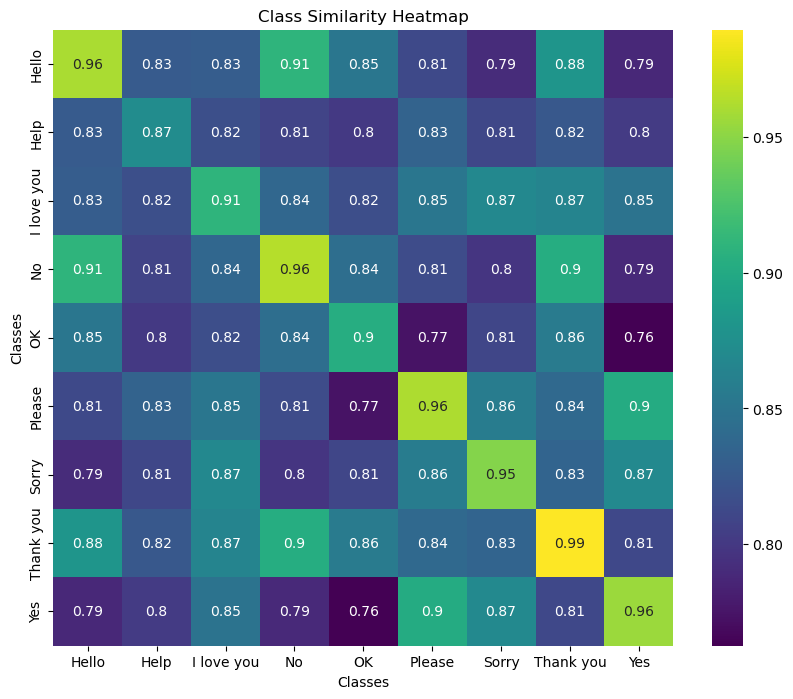

In [46]:
plot_class_similarity_heatmap(data_dir, num_samples=2)